In [69]:
import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

In [70]:
df1 = pd.read_csv("mm_ranks.csv", sep=";")

In [71]:
X = df1.iloc[:,:-1]
y = df1.iloc[:,-1]

In [72]:
X_num = df1[['age', 'th', '2wh', 'snip']]
X_cat = df1[['reg', 'goat']]

In [73]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
X_cat2 = ohe.fit_transform(X_cat)

In [74]:
X_cat2 = pd.DataFrame(X_cat2, columns=ohe.get_feature_names())

In [137]:
X_cat2.head()

,x0_cis,x0_eu,x0_na,x0_o,x0_sa,x1_a,x1_d,x1_s,x1_z
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
X_train1 = X_num.join(X_cat2)

In [77]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [78]:
X_train1_sc = sc.fit_transform(X_train1)

#### Correlation matrix

In [79]:
corr = X_train1.join(y).corr()
corr.style.background_gradient(cmap='coolwarm')

,age,th,2wh,snip,x0_cis,x0_eu,x0_na,x0_o,x0_sa,x1_a,x1_d,x1_s,x1_z,rank
age,1.000000,0.107920,-0.095994,-0.010543,0.139269,-0.059851,-0.115756,-0.064455,0.132199,0.003190,-0.047860,0.026275,0.034289,0.277455
th,0.107920,1.000000,-0.098236,0.022152,-0.002468,0.065329,-0.133887,-0.000908,0.016290,-0.072379,-0.170248,0.212291,-0.068369,0.471201
2wh,-0.095994,-0.098236,1.000000,-0.062378,-0.039297,0.075592,-0.034127,-0.028506,-0.032840,-0.018670,0.207036,-0.167117,-0.020169,-0.054501
snip,-0.010543,0.022152,-0.062378,1.000000,-0.119276,0.250480,-0.168690,0.008520,-0.168690,0.078505,-0.018145,0.041202,-0.136351,0.109455
x0_cis,0.139269,-0.002468,-0.039297,-0.119276,1.000000,-0.500000,-0.071429,-0.071429,-0.071429,-0.057735,0.133816,-0.068836,-0.057735,0.184153
x0_eu,-0.059851,0.065329,0.075592,0.250480,-0.500000,1.000000,-0.428571,-0.428571,-0.428571,0.115470,-0.169031,0.100125,-0.000000,0.207080
x0_na,-0.115756,-0.133887,-0.034127,-0.168690,-0.071429,-0.428571,1.000000,-0.061224,-0.061224,-0.049487,-0.016098,0.057214,-0.049487,-0.564609
x0_o,-0.064455,-0.000908,-0.028506,0.008520,-0.071429,-0.428571,-0.061224,1.000000,-0.061224,-0.049487,0.193178,-0.221706,0.164957,-0.158057
x0_sa,0.132199,0.016290,-0.032840,-0.168690,-0.071429,-0.428571,-0.061224,-0.061224,1.000000,-0.049487,-0.016098,0.057214,-0.049487,0.127629
x1_a,0.003190,-0.072379,-0.018670,0.078505,-0.057735,0.115470,-0.049487,-0.049487,-0.049487,1.000000,-0.097590,-0.329502,-0.040000,0.027669


#### Ranks distribution

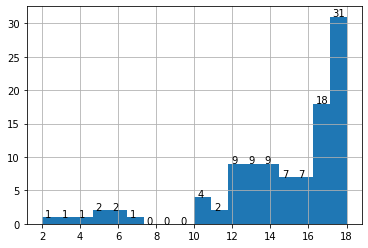

In [80]:
ax = y.hist(bins=18);
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.15, p.get_height() * 1.005))

#### Age distribution

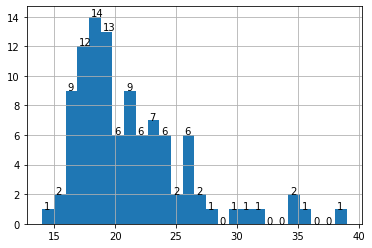

In [81]:
ax = df1['age'].hist(bins=26, range=(14,39))
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + 0.15, p.get_height() * 1.005))

#### Goat distribution

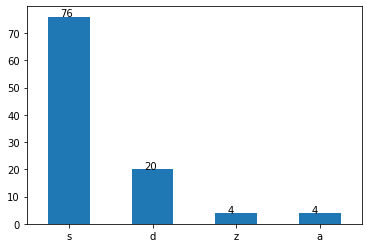

In [82]:
ax = df1['goat'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() * 1.005))

#### Region distribution

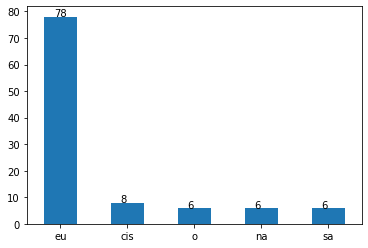

In [83]:
ax = df1['reg'].value_counts().plot(kind='bar', rot=0)
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() + 0.15, p.get_height() * 1.005))

#### Total Hours/Age plot

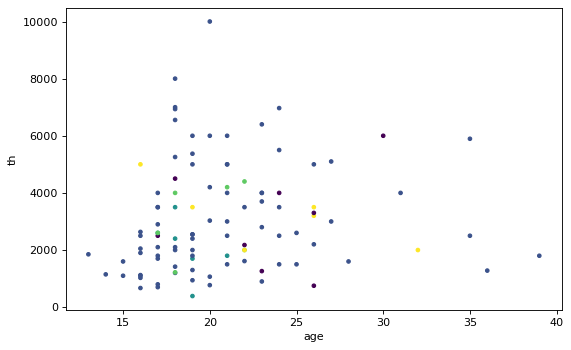

In [84]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['age'], df1['th'], s=10, c=le.fit_transform(df1['reg']));
plt.xlabel("age")
plt.ylabel("th");

#### Rank/age plot

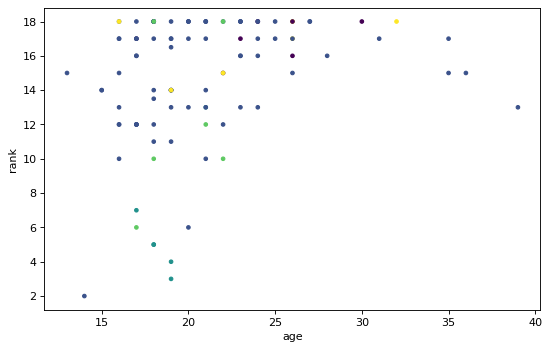

In [85]:
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['age'], df1['rank'], s=10, c=le.fit_transform(df1['reg']));
plt.xlabel("age")
plt.ylabel("rank");

#### Rank/total hours plot

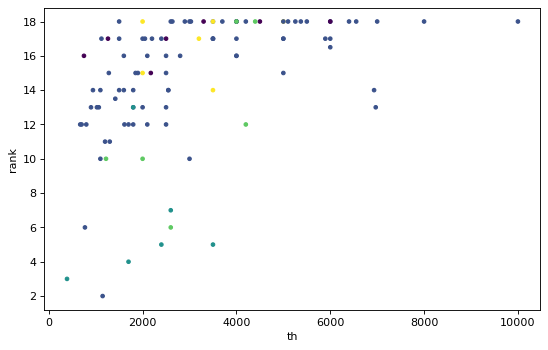

In [86]:
le = LabelEncoder()
plt.figure(figsize=(8, 5), dpi=80)
plt.scatter(df1['th'], df1['rank'], s=10, c=le.fit_transform(df1['reg']));
plt.xlabel("th")
plt.ylabel("rank");

#### ML models stuff

In [87]:
from sklearn.linear_model import LinearRegression
lin1 = LinearRegression()

In [88]:
lin1.fit(X_train1, y)

LinearRegression()

In [89]:
pr1 = lin1.predict(X_train1)

In [90]:
from sklearn.metrics import r2_score
r2_score(y, pr1)

0.5800030543319246

In [91]:
lin1.coef_

array([ 0.10231148,  0.00076377,  0.00014053,  0.52344202,  3.49786145,
        1.2881211 , -6.3781238 , -1.16797818,  2.76011943,  0.24438534,
       -1.26556782, -0.2439214 ,  1.26510387])

In [92]:
from sklearn.ensemble import RandomForestRegressor

In [93]:
rfr = RandomForestRegressor()

In [94]:
rfr.fit(X_train1, y)

RandomForestRegressor()

In [95]:
pr2 = rfr.predict(X_train1)

In [96]:
test1 = pd.read_csv("mm_ranks2.csv", sep=";")

In [97]:
test1

,name,age,th,2wh,reg,snip,goat,rank
0,desu,22,2000,15.0,sa,0,s,NaN
1,scanix,19,1500,0.0,eu,0,s,NaN
2,zezzy,16,1700,110.0,eu,0,a,NaN
3,calva,16,1123,32.0,eu,1,s,NaN
4,hyper_haze,18,1183,20.0,eu,0,s,NaN
...,...,...,...,...,...,...,...,...
143,BoDaddy,25,2732,23.4,na,0,s,NaN
144,Azusa,18,4629,46.1,o,1,d,NaN
145,Alekira,23,10216,29.6,o,0,d,NaN
146,ThatGuyBill,18,5600,75.0,o,0,s,NaN


In [98]:
test1_num = test1[['age', 'th', '2wh', 'snip']]
test1_cat = test1[['reg', 'goat']]

In [99]:
test1_cat2 = ohe.transform(test1_cat)

In [100]:
test1_cat2 = pd.DataFrame(test1_cat2, columns=ohe.get_feature_names())

In [101]:
X_test1 = test1_num.join(test1_cat2)

In [102]:
X_test1_sc = sc.transform(X_test1)

In [103]:
X_train1.head()

,age,th,2wh,snip,x0_cis,x0_eu,x0_na,x0_o,x0_sa,x1_a,x1_d,x1_s,x1_z
0,21,3000,30.0,1,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,17,800,14.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,17,2500,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,24,5500,10.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,24,6969,24.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [104]:
X_test1.head()

,age,th,2wh,snip,x0_cis,x0_eu,x0_na,x0_o,x0_sa,x1_a,x1_d,x1_s,x1_z
0,22,2000,15.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,19,1500,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16,1700,110.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16,1123,32.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18,1183,20.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [105]:
pr_test1 = lin1.predict(X_test1)

In [106]:
pr_test2 = rfr.predict(X_test1)

In [107]:
X_test1.head()

,age,th,2wh,snip,x0_cis,x0_eu,x0_na,x0_o,x0_sa,x1_a,x1_d,x1_s,x1_z
0,22,2000,15.0,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,19,1500,0.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,16,1700,110.0,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,16,1123,32.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,18,1183,20.0,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [108]:
np.set_printoptions(suppress=True)
rfr.feature_importances_ * 100

array([17.27826359, 32.35969884,  6.20553237,  1.10266291,  0.3313362 ,
        1.01427494, 30.76715132,  4.55093503,  0.28827532,  2.44937809,
        2.78873555,  0.51658149,  0.34717436])

In [109]:
dict(zip(X_test1.columns, lin1.coef_))

{'age': 0.10231147667843285,
 'th': 0.0007637733535518897,
 '2wh': 0.00014052977483544333,
 'snip': 0.5234420205317242,
 'x0_cis': 3.497861449916713,
 'x0_eu': 1.28812110111757,
 'x0_na': -6.37812380229982,
 'x0_o': -1.167978181201774,
 'x0_sa': 2.760119432467308,
 'x1_a': 0.24438534046079005,
 'x1_d': -1.2655678162344908,
 'x1_s': -0.24392139845848815,
 'x1_z': 1.2651038742321865}

In [110]:
lin1.intercept_

9.470029861026504

In [111]:
from sklearn.model_selection import GridSearchCV
gcv = GridSearchCV(
    rfr, param_grid={
    'n_estimators': [50 ,30, 20, 10], 
    'max_depth': [2, 3, 4, 5, None],
    'max_samples': [None, 0.9],
    'random_state': [42]
    },
    cv=5
)
gcv.fit(X_train1, y)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_samples': [None, 0.9],
                         'n_estimators': [50, 30, 20, 10],
                         'random_state': [42]})

In [112]:
gcv.best_params_

{'max_depth': 3, 'max_samples': None, 'n_estimators': 50, 'random_state': 42}

In [113]:
gcv.best_score_

0.4190121895184924

In [114]:
gcv.best_estimator_.fit(X_train1, y)
pr3 = gcv.best_estimator_.predict(X_test1)

In [115]:
dict(zip(X_test1.columns, gcv.best_estimator_.feature_importances_))

{'age': 0.14183452857318465,
 'th': 0.4104693364072838,
 '2wh': 0.01350010385788959,
 'snip': 0.0006524317622337227,
 'x0_cis': 0.0,
 'x0_eu': 0.006222734662522923,
 'x0_na': 0.37342823615392867,
 'x0_o': 0.022719417921916098,
 'x0_sa': 0.0007548217455147494,
 'x1_a': 0.011966093797661859,
 'x1_d': 0.017556052954469194,
 'x1_s': 0.0004308787154707207,
 'x1_z': 0.0004653634479238829}

In [116]:
from sklearn.svm import SVR
svr = SVR()

In [117]:
gcv3 = GridSearchCV(
    svr, param_grid={
    'kernel': ['poly', 'rbf', 'linear', 'sigmoid'],
    'C': [27, 25, 23, 20, 15, 10, 8],
    'epsilon': [0.1, 0.3, 0.65, 1., 1.3, 1.65, 2, 2.3, 2.65]
    },
    cv=5
)
gcv3.fit(X_train1_sc, y)
gcv3.best_params_

{'C': 10, 'epsilon': 1.0, 'kernel': 'rbf'}

In [118]:
from sklearn.model_selection import cross_validate 

In [119]:
# Linear Regression
#print(np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=5, scoring='r2')['test_score']))
#print(np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=4, scoring='r2')['test_score']))
#print(np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
print(np.mean(cross_validate(lin1, X_train1, y, cv=3, scoring='r2')['test_score']))

-4.554514683353154
-1.6578206201125227
-4.611526516353167
-0.9233591520889702
-4.783051967423461
-1.252868376239275


In [120]:
# RF
#print(np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
r2_5 = np.mean(cross_validate(rfr, X_train1, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
r2_4 = np.mean(cross_validate(rfr, X_train1, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
r2_3 = np.mean(cross_validate(rfr, X_train1, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
print(np.mean([r2_3, r2_4, r2_5]))

-2.848073227991489
0.35673178795772836
-2.9757117045166472
0.34497122173779116
-3.0342685901575877
0.3302387503477409
0.3439805866810868


In [121]:
# Optimized RF
#print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
r2_5 = np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
r2_4 = np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
r2_3 = np.mean(cross_validate(gcv.best_estimator_, X_train1, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
print(np.mean([r2_3, r2_4, r2_5]))

-2.7709925269371842
0.4190121895184924
-2.967206996754592
0.3505927211902776
-2.9336535077817807
0.38296111336668687
0.384188674691819


In [122]:
#SVR
#print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
r2_5 = np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
r2_4 = np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
r2_3 = np.mean(cross_validate(gcv3.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
print(np.mean([r2_3, r2_4, r2_5]))

-2.7066736110283673
0.4482294038188825
-2.9340113711018594
0.37253743095216785
-2.848297993081768
0.41729686603430466
0.41268790026845165


In [123]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor()

In [124]:
gcv2 = GridSearchCV(
    knr, 
    param_grid={
        'n_neighbors': [10,8,6,5,4,3,2],
        'weights': ['uniform', 'distance']
    }, 
    cv=5
)
gcv2.fit(X_train1_sc, y)
(gcv2.best_params_, gcv2.best_score_)

({'n_neighbors': 3, 'weights': 'uniform'}, 0.4686976669142859)

In [125]:
# KNR
#print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
r2_5 = np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
r2_4 = np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
r2_3 = np.mean(cross_validate(gcv2.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
print(np.mean([r2_3, r2_4, r2_5]))

-2.6111880722302607
0.4686976669142859
-2.679140865782795
0.454200805519419
-2.8421534781381155
0.4180437646931841
0.446980745708963


In [126]:
from sklearn.linear_model import BayesianRidge
br = BayesianRidge()

In [127]:
gcv5 = GridSearchCV(br, 
                    param_grid={'alpha_1':[1e-05,1e-06,1e-07], 
                                'alpha_2':[1e-05,1e-06,1e-07], 
                                'lambda_1':[1e-05,1e-06,1e-07], 
                                'lambda_2':[1e-05,1e-06,1e-07]}, 
                    cv=5
)
gcv5.fit(X_train1_sc, y)
(gcv5.best_params_, gcv5.best_score_)

({'alpha_1': 1e-07, 'alpha_2': 1e-05, 'lambda_1': 1e-05, 'lambda_2': 1e-07},
 0.4052323354659911)

In [128]:
# BR
#print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=5, scoring='neg_root_mean_squared_error')['test_score']))
r2_5 = np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=5, scoring='r2')['test_score'])
print(r2_5)
#print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=4, scoring='neg_root_mean_squared_error')['test_score']))
r2_4 = np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=4, scoring='r2')['test_score'])
print(r2_4)
#print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_mean_absolute_error')['test_score']))
print(np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=3, scoring='neg_root_mean_squared_error')['test_score']))
r2_3 = np.mean(cross_validate(gcv5.best_estimator_, X_train1_sc, y, cv=3, scoring='r2')['test_score'])
print(r2_3)
print(np.mean([r2_3, r2_4, r2_5]))

-2.78897134476114
0.4052323354659911
-2.8750902616181424
0.3853064300826057
-2.8412959729798772
0.4216315010877952
0.40405675554546394


In [129]:
# KNR
gcv2.best_estimator_.fit(X_train1_sc, y)
pr4 = gcv2.best_estimator_.predict(X_test1_sc)

In [130]:
# SVR
gcv3.best_estimator_.fit(X_train1_sc, y)
pr5 = gcv3.best_estimator_.predict(X_test1_sc)

In [131]:
# BR
gcv5.best_estimator_.fit(X_train1_sc, y)
pr6 = gcv5.best_estimator_.predict(X_test1_sc)

In [132]:
len(pr4)

148

In [133]:
pr_ens = pr3*0.2 + pr4 * 0.26 + pr5 * 0.28 + pr6 * 0.26
len(pr_ens)

148

In [134]:
results = pd.DataFrame([pr_test1, pr_test2, pr3, pr4, pr5, pr6, pr_ens], 
                       index=['LR', 'RFR', 'RFR_GC', 'KNR_GC', 'SVR_GC', 'BR_GC', 'ENC'],
                       columns=test1['name']
                      )
# results = results.reindex(['name', 'LR', 'RFR', 'RFR_GC', 'SVR_GC'])
results.iloc[:,-5:]

name,BoDaddy,Azusa,Alekira,ThatGuyBill,Disolligawedere
LR,7.495689,12.943518,17.196516,14.187407,12.343215
RFR,9.770000,15.865000,15.395000,16.370000,11.865000
RFR_GC,9.684464,16.143083,16.083480,16.441084,12.554062
KNR_GC,7.333333,8.666667,11.333333,12.000000,14.833333
SVR_GC,7.994663,9.743609,13.642563,16.638964,12.699392
BR_GC,8.147692,13.027493,16.917096,14.220437,12.506437
ENC,8.200465,11.597309,14.381725,14.764440,13.174983


In [135]:
print('a')

a


In [136]:
results.loc[:,results.loc['ENC']>17.5]

name,burg3r,KipCarry,HShadows,quinxxxx,pronax_3_
LR,18.279828,20.087673,20.367810,20.205219,19.355432
RFR,17.780000,16.480000,16.830000,17.415000,17.700000
RFR_GC,17.225672,16.673898,16.877990,16.988146,17.048223
KNR_GC,17.666667,17.666667,17.666667,18.000000,18.000000
SVR_GC,17.672992,17.047622,17.007559,17.000032,17.153836
BR_GC,17.997397,19.647888,19.891729,19.710873,18.868853
ENC,17.666229,17.809898,17.902897,17.962465,17.798620
